### Titanic - machine learning from Disaster 
This is my <b>third</b> attempt to understand Kaggle comeptiton https://www.kaggle.com/c/titanic/overview 

### Goal: 
The main goal of this project is to build predictive model to answer question: <b>what sorts of people were more likely to survive?</b> using passenger data (ie name, age, gender, socio-economic class, etc)? 
However for me as a enthustaist of learning ML it will be great opportunity to gain some practise on: 
- exploring data 
- cleaning data
- feature engineering 
- model selection 

In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train_modified.csv")
holdout = pd.read_csv("holdout_modified.csv")

In [3]:
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

In [4]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = scores.mean()

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)
scores =cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()

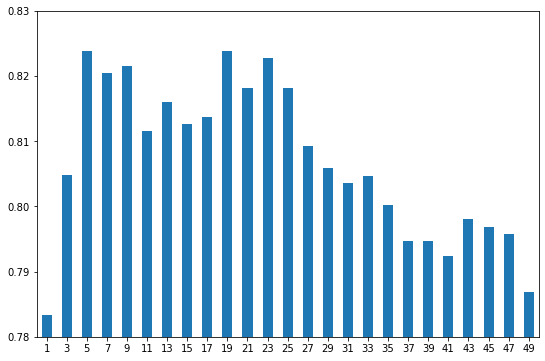

In [6]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_cvs = cross_val_score(knn, all_X, all_y, cv=10)
    scores = knn_cvs.mean()
    knn_scores[k]= scores
    
plot_dict(knn_scores)


Automating Hyperparameter Optimization with Grid Search

In [7]:
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier() 
gscv = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
gscv.fit(all_X, all_y)
best_params = gscv.best_params_
best_score = gscv.best_score_

In [8]:
print(best_params)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [9]:
print(best_score)

0.8282646691635456


In [10]:
holdout_no_id = holdout.drop(['PassengerId'],axis=1)
best_knn = gscv.best_estimator_

holdout_predictions = best_knn.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_1.csv",index=False)

### Try to use Random Forest 

In [11]:
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()

In [12]:
print(accuracy_rf)

0.8204119850187267


In [13]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

In [14]:
print(best_params)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}


In [15]:
print(best_score)

0.838414481897628


In [16]:
best_rf = gscv.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_2.csv",index=False)